In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch10 N차원 배열 다루기</font>

# 4절. 복사와 뷰

## 4.1 할당

In [17]:
import numpy as np

a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [18]:
b = a
b

array([0, 1, 2, 3, 4, 5])

In [19]:
a is b  # a객체와 b객체가 같은가?

True

In [20]:
b.shape = (2, 3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [21]:
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)

- 슬라이싱할 경우 자동 view 생성

In [22]:
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [37]:
d = c.view()
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
c is d  # c객체와 d객체가 같은가?

False

In [39]:
id(c), id(d)

(2475170223696, 2475170224272)

In [40]:
np.all(c == d)  # c와 d의 내용이 모두 같음

True

In [41]:
d.shape = (3, 4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [44]:
d[0, ::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [45]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [46]:
# 슬라이싱이 될 때 자동 뷰가 반환됨

c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [47]:
d = c[:, :-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [48]:
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [49]:
c

array([[ 0,  1,  2,  3, 99,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3 깊은 복사

In [50]:
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [51]:
d = c[:, :-1].copy()  # 깊은 복사
d[..., -2] = 99
d

array([[ 0,  1,  2, 99,  4],
       [ 6,  7,  8, 99, 10]])

In [52]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [62]:
a = np.arange(12) ** 2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [63]:
a[[0, 0, 1, 5]]

array([ 0,  0,  1, 25])

In [64]:
# 인덱싱하기 위한 값을 배열로 만듦

i = np.array([0, 0, 1, 5])
a[i]

array([ 0,  0,  1, 25])

In [65]:
j = np.array([[0, 0], [1, 5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [55]:
# image_data = [[[255, 255, 255],
#                [255, 255, 255],
#                [255, 255, 255],
#                [0, 0, 0],
#                ],
#              ]

In [56]:
# R G B

palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white

In [66]:
image_index = np.array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
                        [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
                        [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
                        [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
                        [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
                        [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
                        [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])
image_data = palette[image_index]

In [67]:
image_data.shape

(10, 10, 3)

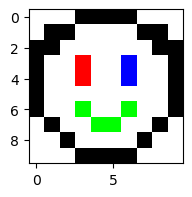

In [68]:
from matplotlib import pyplot as plt

plt.figure(figsize = (2, 2))
plt.imshow(image_data)
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [69]:
a = np.array([0, 1, 10, 11, 12, 13, 14, 15, 99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [70]:
a % 2 == 0

array([ True, False,  True, False,  True, False,  True, False, False])

In [71]:
a[[True, False,  True, False,  True, False,  True, False, False]]

array([ 0, 10, 12, 14])

In [73]:
a[a % 2 == 0]  # 논리 배열을 이용한 인덱싱 시 True요소만 추출

array([ 0, 10, 12, 14])

In [74]:
# a에서 12보다 큰값만 추출

a[a > 12]

array([13, 14, 15, 99])

# 6절. 선형대수

- 2차원 넘파이배열을 행렬
    * 행렬 곱 : @, dot(), 단위행렬
    * 역행렬 : np.linalg.inv(행렬) : 역행렬 @ 행렬 = 단위행렬
    * 전치행렬 : 행렬.T / 행렬.transpose()

In [78]:
a = np.array([[1, 2], [3, 4]])
a  # 정방행렬

array([[1, 2],
       [3, 4]])

In [81]:
# a의 역행렬 : a의 역행렬 @ a → 단위행렬

b = np.linalg.inv(a)
b

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [84]:
a.dot(b), a @ b

(array([[1.00000000e+00, 1.11022302e-16],
        [0.00000000e+00, 1.00000000e+00]]),
 array([[1.00000000e+00, 1.11022302e-16],
        [0.00000000e+00, 1.00000000e+00]]))

## 6.1 선형 연립 방정식 풀기(독립변수1, 데이터2)

In [85]:
x = np.array([2, 4])  # 독립변수
Y = np.array([40, 60])  # 종속변수

X = np.dstack((x, np.ones(len(x))))
X

array([[[2., 1.],
        [4., 1.]]])

In [89]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y

wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])